##Employee Attrition Analysis 

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Preliminaries

In [ ]:
#Uploading data set to colab from local drive
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [ ]:
import io
#Reading csv file into pandas data frame  
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))

#Displaying first few rows of data set
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#No. of rows (records), no. of columns (variables), python data types, no. of records with no missing entires
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 1470 entries, 35 columns with the column 'Attrition' predicting Yes or No for whether an employee stays at the firm or leaves. There are no missing entries.

In [ ]:
#No. of unique values in each column
print(df.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
#No. of missing entries for each column (variable)
df.isnull().sum(axis = 0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Various data types by manually examining data set-
1.   Categorical - Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime
2.   Temporal - Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance
3. Integer - Age, DailyRate, DistanceFromHome, EmployeeCount, EmployeeNumber, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, StandardHours, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [ ]:
#Finding mean, median etc of numerical columns with df.describe()
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##Correlation matrix

In [ ]:
#Heatmap of correlations

# generating pairwise correlation
corr = df.corr()
  
# Displaying dataframe as an heatmap 
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,nan,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,nan,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,nan,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,nan,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,nan,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,nan,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,nan,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,nan,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,nan,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,nan,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,nan,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,nan,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,nan,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,nan,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,nan,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,nan,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,nan,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,nan,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


When you divide by zero, you get NaN. Another way of putting it, the standard deviation of x or y cannot be 0. When you have a vector of identical values, the std is 0. The NaN, in this case, is interpretted as no correlation between the two variables.

##Histograms

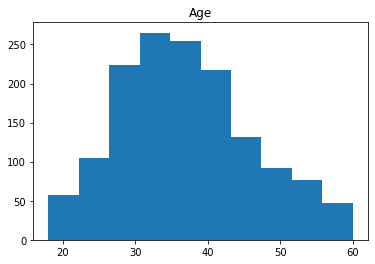

In [ ]:
plt.title('Age');
plt.hist(df['Age']);

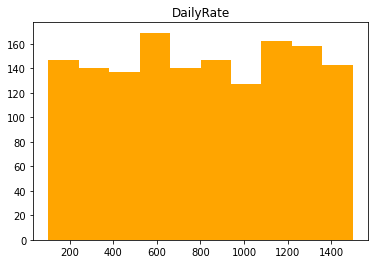

In [ ]:
plt.title('DailyRate');
plt.hist(df['DailyRate'],color='orange');

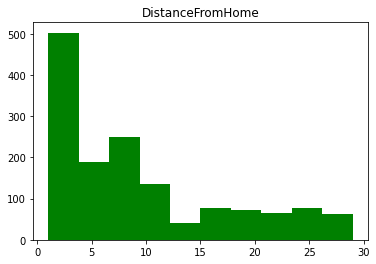

In [ ]:
plt.title('DistanceFromHome');
plt.hist(df['DistanceFromHome'],color='green');

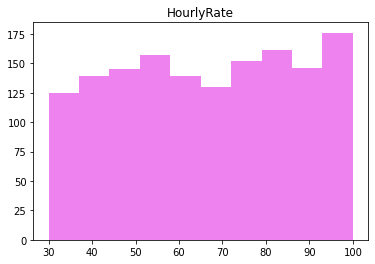

In [ ]:
plt.title('HourlyRate');
plt.hist(df['HourlyRate'],color='violet');

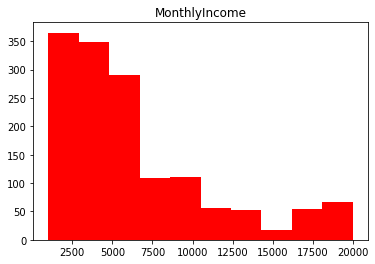

In [ ]:
plt.title('MonthlyIncome');
plt.hist(df['MonthlyIncome'],color='red');

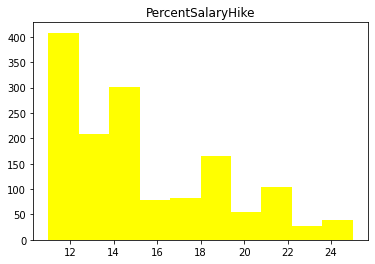

In [ ]:
plt.title('PercentSalaryHike');
plt.hist(df['PercentSalaryHike'],color='yellow');

##Bar graphs

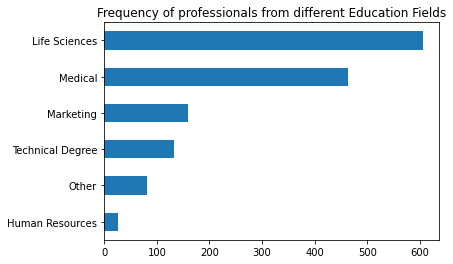

In [ ]:
df['EducationField'].value_counts().plot(kind='barh').invert_yaxis()
plt.title('Frequency of professionals from different Education Fields');

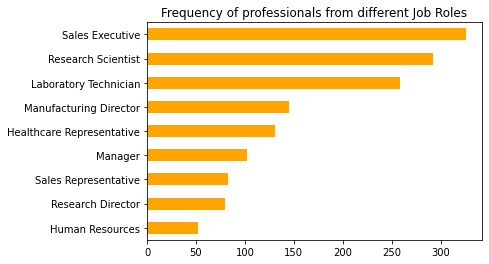

In [ ]:
df['JobRole'].value_counts().plot(kind='barh',color='orange').invert_yaxis()
plt.title('Frequency of professionals from different Job Roles');

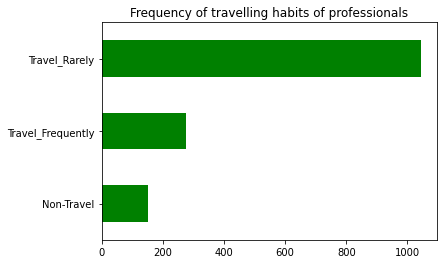

In [ ]:
df['BusinessTravel'].value_counts().plot(kind='barh',color='green').invert_yaxis()
plt.title('Frequency of travelling habits of professionals');

##Pie Charts

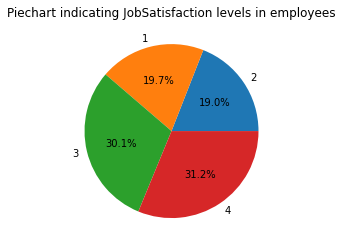

In [ ]:
#Piechart for JobSatisfaction
jobsat_level = df.groupby('JobSatisfaction').agg('count')
jobsat_labels = jobsat_level.Age.sort_values().index 
jobsat_counts = jobsat_level.Age.sort_values()

plt.pie(jobsat_counts, labels = jobsat_labels, autopct='%1.1f%%');
plt.title('Piechart indicating JobSatisfaction levels in employees');

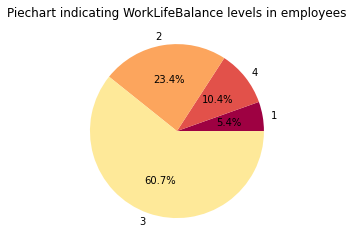

In [ ]:
#Piechart for WorkLifeBalance
WL_level = df.groupby('WorkLifeBalance').agg('count')
WL_labels = WL_level.Age.sort_values().index 
WL_counts = WL_level.Age.sort_values()

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.pie(WL_counts, labels = WL_labels, colors=colors, autopct='%1.1f%%');
plt.title('Piechart indicating WorkLifeBalance levels in employees');

##Scatter Plot

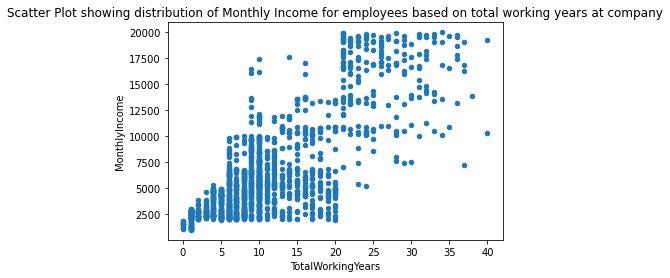

In [ ]:
df.plot.scatter(x='TotalWorkingYears',y='MonthlyIncome');
plt.title('Scatter Plot showing distribution of Monthly Income for employees based on total working years at company');

##Bar graphs differentiating employees who stayed and left the firm

In [ ]:
#For monthly income based on attrition
df1 = df
monthlyincome_range = []
for row in df1['MonthlyIncome']:
        if row < 2000 :    monthlyincome_range.append('<2000')
        elif row < 4000:   monthlyincome_range.append('2001-4000')
        elif row < 6000:   monthlyincome_range.append('4001-6000')
        elif row < 8000:   monthlyincome_range.append('6001-8000')
        elif row < 10000:  monthlyincome_range.append('8001-10000')
        else:           monthlyincome_range.append('>10000')

df1['monthlyincome_range'] = monthlyincome_range
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,monthlyincome_range,age_range,DistanceFromHome_range,TotalWorkingYears_range
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,4001-6000,40-49,0-5,6-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,4001-6000,40-49,6-10,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,2001-4000,30-39,0-5,6-10
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2001-4000,30-39,0-5,6-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,2001-4000,20-29,0-5,6-10


In [ ]:
df1['monthlyincome_range'].value_counts()

2001-4000     509
4001-6000     372
>10000        281
6001-8000     175
8001-10000    100
<2000          33
Name: monthlyincome_range, dtype: int64

In [ ]:
df2 = df1[df1['Attrition']=='Yes']
df2['monthlyincome_range'].value_counts()

2001-4000     119
4001-6000      42
>10000         25
6001-8000      18
<2000          18
8001-10000     15
Name: monthlyincome_range, dtype: int64

In [ ]:
df3 = df1[df1['Attrition']=='No']
df3['monthlyincome_range'].value_counts()

2001-4000     390
4001-6000     330
>10000        256
6001-8000     157
8001-10000     85
<2000          15
Name: monthlyincome_range, dtype: int64

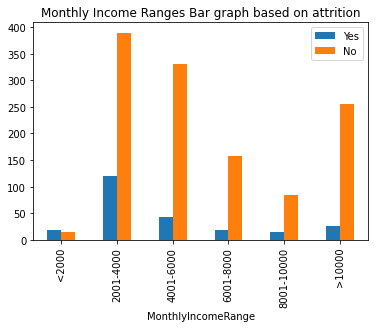

In [ ]:
# creating dataframe
df_a = pd.DataFrame({
    'MonthlyIncomeRange': ['<2000', '2001-4000', '4001-6000','6001-8000','8001-10000','>10000'],
    'Yes': [18, 119, 42, 18, 15, 25],
    'No': [15, 390, 330, 157, 85, 256]
})
  
df_a.plot(x="MonthlyIncomeRange", y=["Yes", "No"], kind="bar");
plt.title('Monthly Income Ranges Bar graph based on attrition');

In [ ]:
#Age range based on attrition

df4 = df
age_range = []
for row in df4['Age']:
        if row < 20 :    age_range.append('18-19')
        elif row < 30:   age_range.append('20-29')
        elif row < 40:   age_range.append('30-39')
        elif row < 50:   age_range.append('40-49')
        else:           age_range.append('50+')

df4['age_range'] = age_range
df4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,monthlyincome_range,age_range,DistanceFromHome_range,TotalWorkingYears_range
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,4001-6000,40-49,0-5,6-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,4001-6000,40-49,6-10,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,2001-4000,30-39,0-5,6-10
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2001-4000,30-39,0-5,6-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,2001-4000,20-29,0-5,6-10


In [ ]:
df4['age_range'].value_counts()

30-39    622
40-49    349
20-29    309
50+      173
18-19     17
Name: age_range, dtype: int64

In [ ]:
df5 = df4[df4['Attrition']=='Yes']
df5['age_range'].value_counts()

30-39    89
20-29    81
40-49    34
50+      23
18-19    10
Name: age_range, dtype: int64

In [ ]:
df6 = df4[df4['Attrition']=='No']
df6['age_range'].value_counts()

30-39    533
40-49    315
20-29    228
50+      150
18-19      7
Name: age_range, dtype: int64

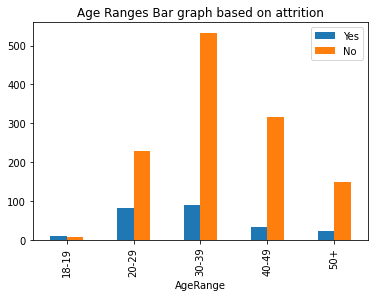

In [ ]:
# creating dataframe
df_a = pd.DataFrame({
    'AgeRange': ['18-19', '20-29', '30-39','40-49','50+'],
    'Yes': [10, 81, 89, 34, 23],
    'No': [7, 228, 533, 315, 150]
})
  
df_a.plot(x="AgeRange", y=["Yes", "No"], kind="bar");
plt.title('Age Ranges Bar graph based on attrition');

In [ ]:
#Distance From Home range based on attrition

df7 = df
DistanceFromHome_range = []
for row in df7['DistanceFromHome']:
        if row < 6 :    DistanceFromHome_range.append('0-5')
        elif row < 11:   DistanceFromHome_range.append('6-10')
        elif row < 16:   DistanceFromHome_range.append('11-15')
        elif row < 21:   DistanceFromHome_range.append('16-20')
        else:          DistanceFromHome_range.append('>20')

df7['DistanceFromHome_range'] = DistanceFromHome_range
df7.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,monthlyincome_range,age_range,DistanceFromHome_range,TotalWorkingYears_range
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,4001-6000,40-49,0-5,6-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,4001-6000,40-49,6-10,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,2001-4000,30-39,0-5,6-10
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2001-4000,30-39,0-5,6-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,2001-4000,20-29,0-5,6-10


In [ ]:
df7['DistanceFromHome_range'].value_counts()

0-5      632
6-10     394
>20      204
16-20    125
11-15    115
Name: DistanceFromHome_range, dtype: int64

In [ ]:
df8 = df7[df7['Attrition']=='Yes']
df8['DistanceFromHome_range'].value_counts()

0-5      87
6-10     57
>20      45
11-15    25
16-20    23
Name: DistanceFromHome_range, dtype: int64

In [ ]:
df9 = df7[df7['Attrition']=='No']
df9['DistanceFromHome_range'].value_counts()

0-5      545
6-10     337
>20      159
16-20    102
11-15     90
Name: DistanceFromHome_range, dtype: int64

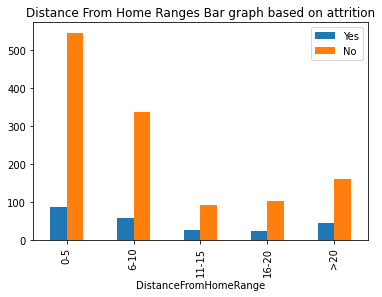

In [ ]:
# creating dataframe
df_a = pd.DataFrame({
    'DistanceFromHomeRange': ['0-5', '6-10', '11-15','16-20','>20'],
    'Yes': [87, 57, 25, 23, 45],
    'No': [545, 337, 90, 102, 159]
})
  
df_a.plot("DistanceFromHomeRange", y=["Yes", "No"], kind="bar");
plt.title('Distance From Home Ranges Bar graph based on attrition');

In [ ]:
#Total Working years range based on attrition

df10 = df
TotalWorkingYears_range = []
for row in df10['TotalWorkingYears']:
        if row < 6 :    TotalWorkingYears_range.append('0-5')
        elif row < 11:   TotalWorkingYears_range.append('6-10')
        elif row < 21:   TotalWorkingYears_range.append('11-20')
        elif row < 31:   TotalWorkingYears_range.append('21-30')
        else:           TotalWorkingYears_range.append('>30')

df10['TotalWorkingYears_range'] = TotalWorkingYears_range
df10.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,monthlyincome_range,age_range,DistanceFromHome_range,TotalWorkingYears_range
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,4001-6000,40-49,0-5,6-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,4001-6000,40-49,6-10,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,2001-4000,30-39,0-5,6-10
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2001-4000,30-39,0-5,6-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,2001-4000,20-29,0-5,6-10


In [ ]:
df10['TotalWorkingYears_range'].value_counts()

6-10     607
11-20    340
0-5      316
21-30    161
>30       46
Name: TotalWorkingYears_range, dtype: int64

In [ ]:
df11 = df10[df10['Attrition']=='Yes']
df11['TotalWorkingYears_range'].value_counts()

6-10     91
0-5      91
11-20    39
21-30    11
>30       5
Name: TotalWorkingYears_range, dtype: int64

In [ ]:
df12 = df10[df10['Attrition']=='No']
df12['TotalWorkingYears_range'].value_counts()

6-10     516
11-20    301
0-5      225
21-30    150
>30       41
Name: TotalWorkingYears_range, dtype: int64

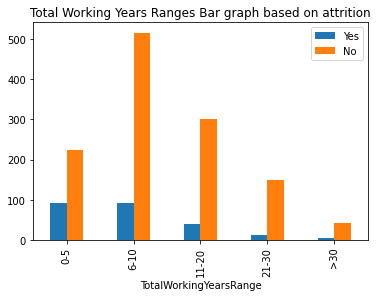

In [ ]:
# creating dataframe
df_a = pd.DataFrame({
    'TotalWorkingYearsRange': ['0-5', '6-10', '11-20','21-30','>30'],
    'Yes': [91, 91, 39, 11, 5],
    'No': [225, 516, 301, 150, 41]
})
  
df_a.plot(x="TotalWorkingYearsRange", y=["Yes", "No"], kind="bar");
plt.title('Total Working Years Ranges Bar graph based on attrition');

In [ ]:
#For OverTime based on attrition
dfa = df[df['Attrition']=='Yes']
dfa['OverTime'].value_counts()

Yes    127
No     110
Name: OverTime, dtype: int64

In [ ]:
dfb = df[df['Attrition']=='No']
dfb['OverTime'].value_counts()

No     944
Yes    289
Name: OverTime, dtype: int64

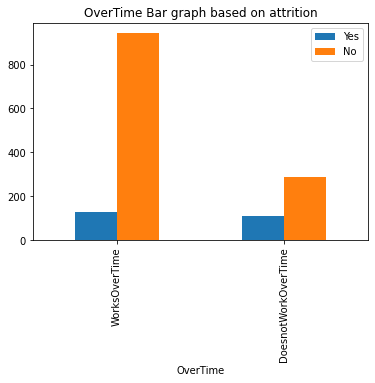

In [ ]:
# creating dataframe
df_a = pd.DataFrame({
    'OverTime': ['WorksOverTime', 'DoesnotWorkOverTime'],
    'Yes': [127,110],
    'No': [944,289]
})
  
df_a.plot(x="OverTime", y=["Yes", "No"], kind="bar");
plt.title('OverTime Bar graph based on attrition');

In [ ]:
#For JobSatisfaction based on attrition
dfa = df[df['Attrition']=='Yes']
dfa['JobSatisfaction'].value_counts()

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64

In [ ]:
dfb = df[df['Attrition']=='No']
dfb['JobSatisfaction'].value_counts()

4    407
3    369
2    234
1    223
Name: JobSatisfaction, dtype: int64

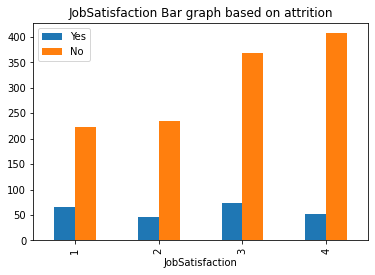

In [ ]:
# creating dataframe
df_a = pd.DataFrame({
    'JobSatisfaction': ['1', '2','3','4'],
    'Yes': [66,46,73,52],
    'No': [223,234,369,407]
})
  
df_a.plot(x="JobSatisfaction", y=["Yes", "No"], kind="bar");
plt.title('JobSatisfaction Bar graph based on attrition');

In [ ]:
#For JobSatisfaction based on attrition
dfa = df[df['Attrition']=='Yes']
dfa['Department'].value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

In [ ]:
dfb = df[df['Attrition']=='No']
dfb['Department'].value_counts()

Research & Development    828
Sales                     354
Human Resources            51
Name: Department, dtype: int64

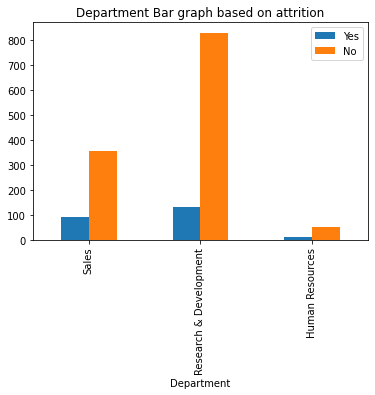

In [ ]:
# creating dataframe
df_a = pd.DataFrame({
    'Department': ['Sales', 'Research & Development','Human Resources'],
    'Yes': [92,133,12],
    'No': [354,828,51]
})
  
df_a.plot(x="Department", y=["Yes", "No"], kind="bar");
plt.title('Department Bar graph based on attrition');

##Dropping highly correlated variables

In [ ]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                               Age  ...  YearsWithCurrManager
Age                       1.000000  ...              0.202089
DailyRate                 0.010661  ...              0.026363
DistanceFromHome          0.001686  ...              0.014406
Education                 0.208034  ...              0.069065
EmployeeCount                  NaN  ...                   NaN
EmployeeNumber            0.010145  ...              0.009197
EnvironmentSatisfaction   0.010146  ...              0.004999
HourlyRate                0.024287  ...              0.020123
JobInvolvement            0.029820  ...              0.025976
JobLevel                  0.509604  ...              0.375281
JobSatisfaction           0.004892  ...              0.027656
MonthlyIncome             0.497855  ...              0.344079
MonthlyRate               0.028051  ...              0.036746
NumCompaniesWorked        0.299635  ...              0.110319
PercentSalaryHike         0.003634  ...              0.011985
Performa

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                          Age  ...  YearsWithCurrManager
Age                       NaN  ...              0.202089
DailyRate                 NaN  ...              0.026363
DistanceFromHome          NaN  ...              0.014406
Education                 NaN  ...              0.069065
EmployeeCount             NaN  ...                   NaN
EmployeeNumber            NaN  ...              0.009197
EnvironmentSatisfaction   NaN  ...              0.004999
HourlyRate                NaN  ...              0.020123
JobInvolvement            NaN  ...              0.025976
JobLevel                  NaN  ...              0.375281
JobSatisfaction           NaN  ...              0.027656
MonthlyIncome             NaN  ...              0.344079
MonthlyRate               NaN  ...              0.036746
NumCompaniesWorked        NaN  ...              0.110319
PercentSalaryHike         NaN  ...              0.011985
PerformanceRating         NaN  ...              0.022827
RelationshipSatisfaction  NaN  

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(); print(to_drop)


['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [ ]:
dfr = df.drop(['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis=1)
dfr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,monthlyincome_range,age_range,DistanceFromHome_range,TotalWorkingYears_range
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Y,Yes,11,1,80,0,0,1,6,0,4001-6000,40-49,0-5,6-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,Y,No,23,4,80,1,3,3,10,1,4001-6000,40-49,6-10,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Y,Yes,15,2,80,0,3,3,0,0,2001-4000,30-39,0-5,6-10
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Y,Yes,11,3,80,0,3,3,8,3,2001-4000,30-39,0-5,6-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,Y,No,12,4,80,1,3,3,2,2,2001-4000,20-29,0-5,6-10


##Employee Attrition Prediction and Model score analysis

In [ ]:
#Importing required packages and libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import io

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,classification_report,roc_auc_score,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from urllib.request import urlopen

In [ ]:
#Uploading data set to colab from local drive
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (2).csv


In [ ]:
#Reading csv file into pandas data frame  
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))

In [ ]:
#Drop unecessary columns and columns with more than 0.75 correlaion
df = df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber','PerformanceRating','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'], axis=1)

In [ ]:
#Assigning category values to numerical colomns
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df.Education.replace({1: 'High School',2:'Undergrad',3:'Graduate',4:'Post Graduate',5:'Doctorate'},inplace=True)
cols = ["JobInvolvement", "JobSatisfaction"]
for col in cols:
    df[col].replace({1 : "Low",2 : "Medium",3 : "High",4 : "Very High"}, inplace = True)

In [ ]:
#features for attrition
var = []
for i in df.columns:
    var.append([i, df[i].nunique(), df[i].drop_duplicates().values])

In [ ]:
#Extracting categorical variables from the data
categorical = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
cat_var = df[categorical]

In [ ]:
#Converting categorical data to indicator variables
dummies = pd.get_dummies(cat_var)
dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Doctorate,Education_Graduate,Education_High School,Education_Post Graduate,Education_Undergrad,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
#Normalizing the attrition variable x
x = MinMaxScaler().fit_transform(dummies)
y = df['Attrition'].values

##Model 1 : Logistic Regression

In [ ]:
#Split train and test data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Fitting model on training data
lr = LogisticRegression()
model1 = lr.fit(X_train,y_train)
model1

LogisticRegression()

In [ ]:
#Storing model predictions on testing data
y_pred=lr.predict(X_test)

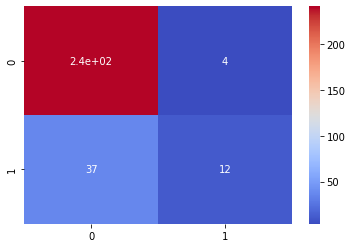

In [ ]:
#Using seaborn for ploting heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cmap ='coolwarm' )
plt.show()

In [ ]:
#Print various scores of model 1 i.e.logistic regression
accuracy_1 = accuracy_score(y_test,y_pred)
print("Accuracy of logistic regression model is :",accuracy_1)
print("Precision of logistic regression model is :",metrics.precision_score(y_test, y_pred))
print("Recall of logistic regression model is :",metrics.recall_score(y_test, y_pred))

Accuracy of logistic regression model is : 0.8605442176870748
Precision of logistic regression model is : 0.75
Recall of logistic regression model is : 0.24489795918367346


Lasso and Ridge Regularization 

In [ ]:
mean_squared_error(y_test,model1.predict(X_test))

0.13945578231292516

In [ ]:
r2 = r2_score(y_test,model1.predict(X_test))
print(r2)

-0.004081632653061051


In [ ]:
#Lasso regularization
a = [0.001, 0.005, 0.01, 0.05, 0.1,0.5]
for i in range(len(a)):
  lasso_reg = linear_model.Lasso(alpha = a[i] )
  lasso_reg.fit(X_train,y_train)
  r2_l = r2_score(y_test,lasso_reg.predict(X_test))
  print("For alpha = " + str(a[i]) + " : MSE is " + str(mean_squared_error(y_test,lasso_reg.predict(X_test))) + "and r^2 score is : " + str(r2_l))




For alpha = 0.001 : MSE is 0.11279108734989944and r^2 score is : 0.1879041710807242
For alpha = 0.005 : MSE is 0.11550897124424735and r^2 score is : 0.16833540704141936
For alpha = 0.01 : MSE is 0.1196397151043211and r^2 score is : 0.13859405124888835
For alpha = 0.05 : MSE is 0.13893516590309596and r^2 score is : -0.00033319450229063463
For alpha = 0.1 : MSE is 0.13893516590309596and r^2 score is : -0.00033319450229063463
For alpha = 0.5 : MSE is 0.13893516590309596and r^2 score is : -0.00033319450229063463


In [ ]:
#Ridge regularization
for i in range(len(a)):
  r_reg = Ridge(alpha = a[i] )
  r_reg.fit(X_train,y_train)
  r2_l = r2_score(y_test,r_reg.predict(X_test))
  print("For alpha = " + str(a[i]) + " : MSE is " + str(mean_squared_error(y_test,r_reg.predict(X_test))) + "and r^2 score is : " + str(r2_l))

For alpha = 0.001 : MSE is 0.11295234761871513and r^2 score is : 0.18674309714525128
For alpha = 0.005 : MSE is 0.11295142100101797and r^2 score is : 0.1867497687926708
For alpha = 0.01 : MSE is 0.11295026497529005and r^2 score is : 0.18675809217791184
For alpha = 0.05 : MSE is 0.11294110566286945and r^2 score is : 0.18682403922734014
For alpha = 0.1 : MSE is 0.1129298741947373and r^2 score is : 0.18690490579789165
For alpha = 0.5 : MSE is 0.11284788376300527and r^2 score is : 0.18749523690636227


##Model 2 : Decision Tree


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model2 = DecisionTreeClassifier(max_depth=4, random_state=1,criterion ='gini')
dt = model2.fit(x_train,y_train)

In [ ]:
model_dt_score_train = model2.score(x_train, y_train)
print("Training score for Decision tree model is : ",model_dt_score_train)
model_dt_score_test = model2.score(x_test, y_test)
print("Testing score for Decision tree model is : ",model_dt_score_test)
y_pred_dt = model2.predict_proba(x_test)[:, 1]

Training score for Decision tree model is :  0.8724489795918368
Testing score for Decision tree model is :  0.7891156462585034


In [ ]:
y_pred_gini = dt.predict(x_test)

In [ ]:
accuracy_2 = accuracy_score(y_test,y_pred_gini)

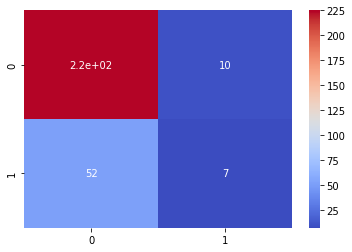

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True,cmap ='coolwarm')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       235
           1       0.41      0.12      0.18        59

    accuracy                           0.79       294
   macro avg       0.61      0.54      0.53       294
weighted avg       0.73      0.79      0.74       294



[Text(366.1875, 733.86, 'X[39] <= 0.5\ngini = 0.257\nsamples = 1176\nvalue = [998, 178]'),
 Text(174.375, 570.78, 'X[38] <= 0.5\ngini = 0.423\nsamples = 323\nvalue = [225, 98]'),
 Text(104.625, 407.70000000000005, 'X[23] <= 0.5\ngini = 0.322\nsamples = 218\nvalue = [174, 44]'),
 Text(69.75, 244.62, 'X[20] <= 0.5\ngini = 0.353\nsamples = 192\nvalue = [148, 44]'),
 Text(34.875, 81.54000000000008, 'gini = 0.329\nsamples = 178\nvalue = [141, 37]'),
 Text(104.625, 81.54000000000008, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(139.5, 244.62, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(244.125, 407.70000000000005, 'X[27] <= 0.5\ngini = 0.5\nsamples = 105\nvalue = [51, 54]'),
 Text(209.25, 244.62, 'X[35] <= 0.5\ngini = 0.487\nsamples = 93\nvalue = [39, 54]'),
 Text(174.375, 81.54000000000008, 'gini = 0.42\nsamples = 60\nvalue = [18, 42]'),
 Text(244.125, 81.54000000000008, 'gini = 0.463\nsamples = 33\nvalue = [21, 12]'),
 Text(279.0, 244.62, 'gini = 0.0\nsamples = 12\nvalue = [1

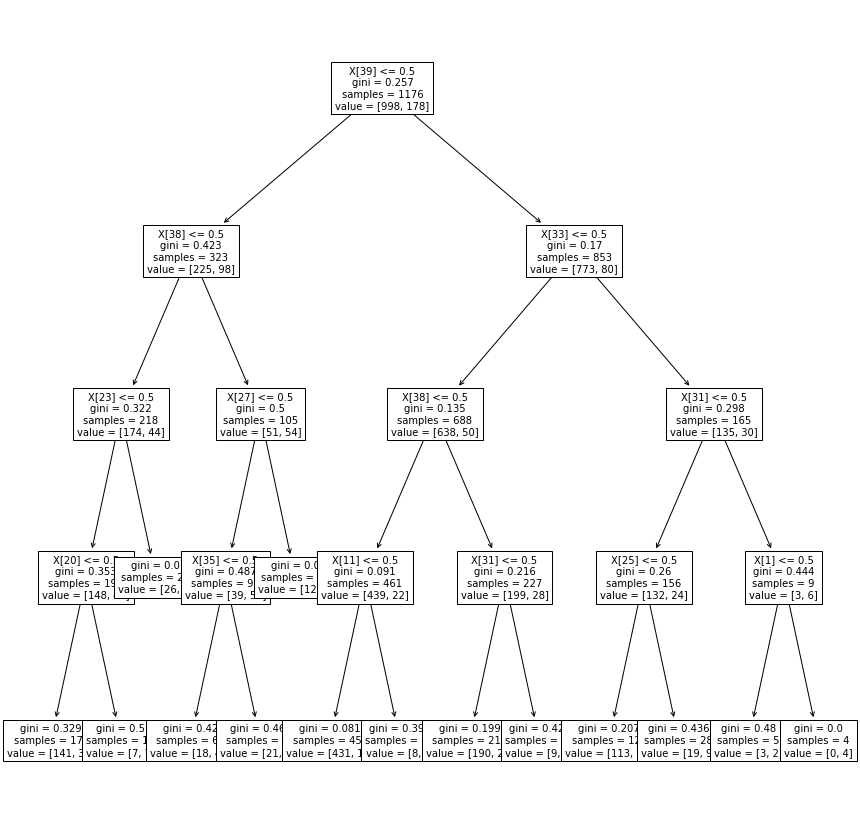

In [ ]:
#Data spliting using decision tree model
plt.subplots(figsize=(15, 15))
tree.plot_tree(dt,fontsize=10,max_depth=4)

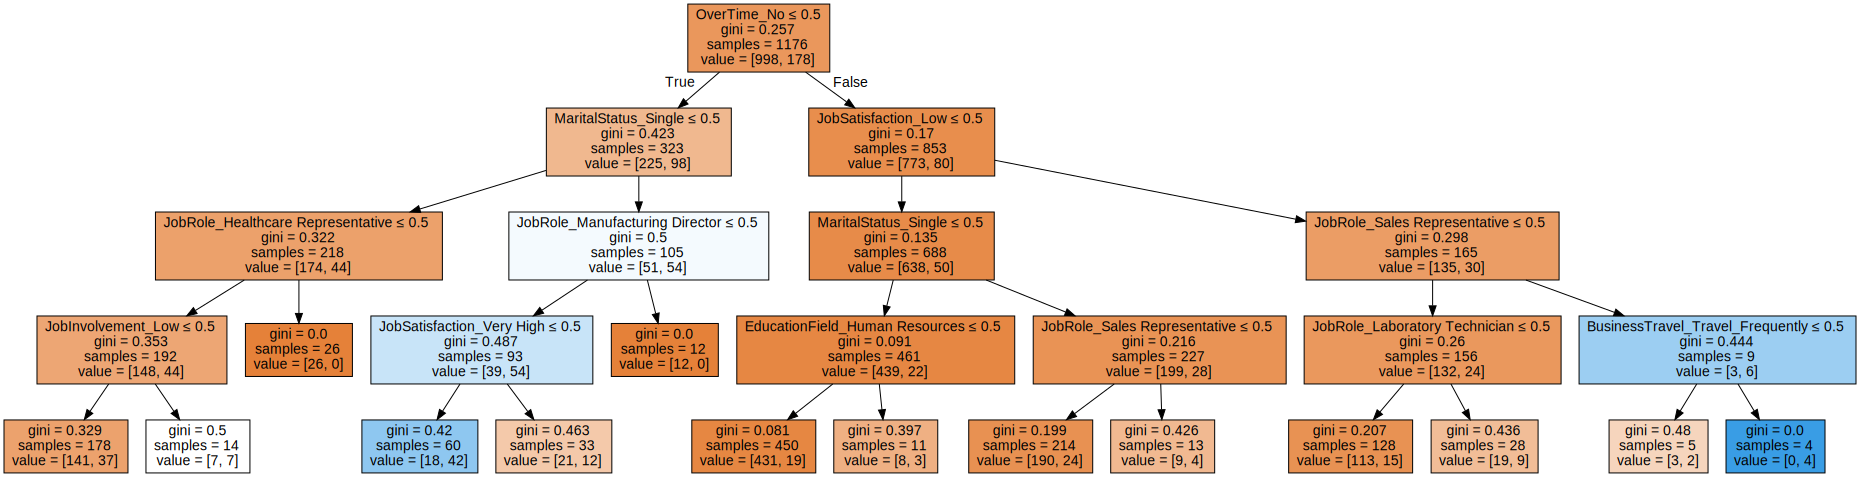

In [ ]:
dt_plot = graphviz.Source(tree.export_graphviz(dt,out_file=None,feature_names=dummies.columns,filled=True,special_characters=True,max_depth=4))
dt_plot

##Model 3 : Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)

In [ ]:
model3 = rf.fit(x_train, y_train)

In [ ]:
y_pred_rf = model3.predict(x_test)

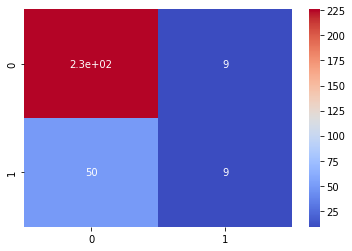

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True,cmap ='coolwarm' )
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       235
           1       0.50      0.15      0.23        59

    accuracy                           0.80       294
   macro avg       0.66      0.56      0.56       294
weighted avg       0.75      0.80      0.75       294



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


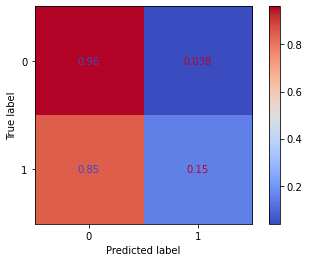

In [ ]:
plot_confusion_matrix(rf, x_test, y_test, normalize="true",cmap ='coolwarm')

In [ ]:
accuracy_3 = accuracy_score(y_test ,y_pred_rf)

Text(0, 0.5, 'Attrition variables')

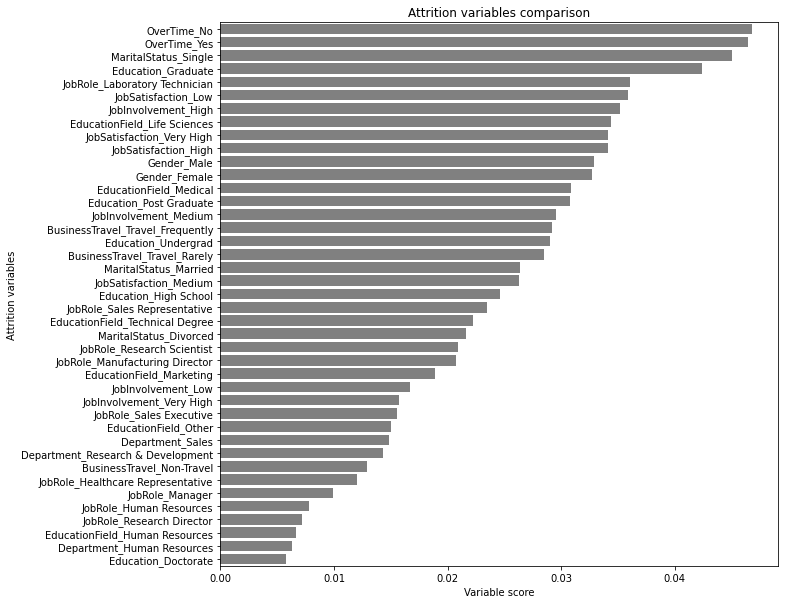

In [ ]:
#Plotting relative importance of variables in determining attrition and primary area of focus 
imp = np.array(rf.feature_importances_)
cols = np.array(dummies.columns)
data={'variable_names':cols,'imp_variables':imp}
v = pd.DataFrame(data)
v.sort_values(by=['imp_variables'], ascending=False,inplace=True) 
plt.figure(figsize=(10,10))
sns.barplot(x=v['imp_variables'], y=v['variable_names'],color  = 'grey')
plt.title('Attrition variables comparison')
plt.xlabel('Variable score')
plt.ylabel('Attrition variables')

1.From variable score plot we observe overtime variable has maximum influence on attrition followed by marital status.

2.Single employees have more attrition rate than married employees .

3.Gradute employees have greater as compared to post-graduates 

This information of utmost importance to firms which will help them in introducing specific reforms considering the above analysis and retain valuable employees and boost firm growth indirectly .

##Model 4 : K-Nearest Neighbours

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

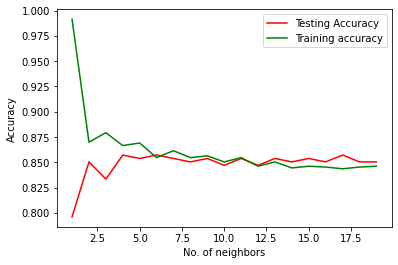

In [ ]:
n = np.arange(1,20)
train =np.empty(len(n))
test = np.empty(len(n))

for i,k in enumerate(n):
    model4 = KNeighborsClassifier(n_neighbors=k)
    model4.fit(X_train, y_train)
    train[i] = model4.score(X_train, y_train)
    test[i] = model4.score(X_test, y_test) 

plt.plot(n, test, label='Testing Accuracy',color = 'red')
plt.plot(n, train, label='Training accuracy',color = 'green')
plt.legend()
plt.xlabel("No. of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
model4_5 = KNeighborsClassifier(n_neighbors=6)
model4_5.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
model4_5.score(X_test,y_test)

0.8571428571428571

In [ ]:
accuracy_4 = model4_5.score(X_test,y_test)

In [ ]:
y_pred = model4_5.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[247,   0],
       [ 42,   5]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,247,0,247
1,42,5,47
All,289,5,294


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.11      0.19        47

    accuracy                           0.86       294
   macro avg       0.93      0.55      0.56       294
weighted avg       0.88      0.86      0.81       294



##Model Comparison

In [ ]:
compare = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','KNeighboursClassifier'],'Score' : [accuracy_1,accuracy_2,accuracy_3,accuracy_4]})

In [ ]:
compare.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.860544
3,KNeighboursClassifier,0.857143
2,Random Forest Classifier,0.799320
1,Decision Tree Classifier,0.789116


Hence , KNeighboursClassifier and Logistic regression are best competitive models for employee attritioon prediction